# Tutorial 7: Potentials and Forces (Derivatives)

The energy of a particle in a field has the form: 

$$
V(r) = \frac{3}{2r^2} - \frac{14}{3r}
$$

where $r$ is the distance from the centre of the field.

(a) Create a python function to compute this potential as a function of $r$.

(b) Then, create an appropiate vector for $r$ and plot this potential $V(r)$ vs $r$. What kind of physical system could this potential represent?

(c) Compute the force $F(r)$ as a function of $r$ using both the analytical expression and the numerical derivative. Compare the results.

(d) Find the maximum possible value if the attractive force $F(r)_{max}$ and the distance $r_{max}$ at which the particle would be subject to this force.

In [12]:
# import the necessary libraries
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp
import scipy.optimize as opt
import scienceplots as scplt

### (a) Create a python function to compute this potential as a function of $r$.

In [3]:
def potential(r):
    """
    Function to compute the potential as a 
    function of the distance r.

    Parameters
                r: floar - 
                
    Returns
                -float: the potential at distance r.
                
    """

    v_r = 3/(2 * r ** 2) - 14/(3 * r)

    return v_r

### (b) Then, create an appropiate vector for $r$ and plot this potential $V(r)$ vs $r$. What kind of physical system could this potential represent?

In [111]:
# Define the vector 
r_vector = np.linspace(0.22, 20, 1000)

# Call the function 
v_r = potential(r_vector)

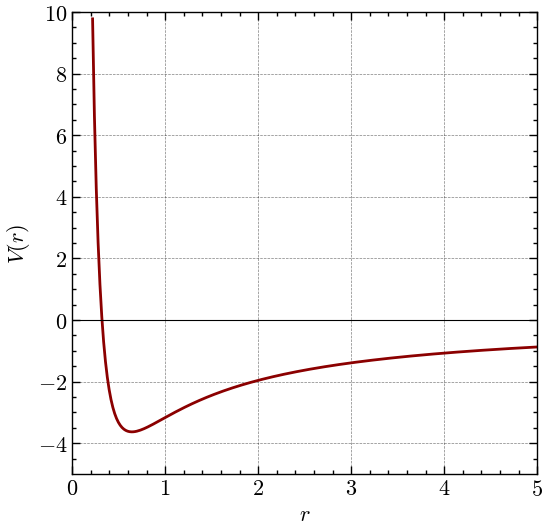

In [112]:
# Make a plot of the potential 
with plt.style.context(["science", "notebook", "no-latex", "grid"]):
    fig, ax = plt.subplots(figsize = (6, 6))

    ax.plot(r_vector, v_r, color = 'darkred')
    ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)

    ax.set_xlabel(r"$r$")
    ax.set_ylabel(r'$V(r)$')
    ax.set_xlim(0, 5)
    ax.set_ylim(-5, 10)

    plt.show()


This potential could describe the potential energy between two molecules. It could be used to describe (in a general way) the dynamics of two molecules as they get closer of far away from each other.

### (c) Compute the force $F(r)$ as a function of $r$ using both the analytical expression and the numerical derivative. Compare the results.

In [113]:
# Let's find the force using sympy 

# Define our symbols 
r = sp.Symbol("r")

# Convert the python function into a symbolic expression 
V_r = sp.simplify(potential(r))
#V_r = 3 / (2 * r ** 2) - 14/(3 * r)

# Compute the derivative (Force)
F_r = -1 * sp.diff(V_r, r)

F_r

14/(3*r**2) + (9 - 28*r)/(3*r**3)

In [114]:
# Now, let's evaluate this force using our r vector 
F_vec = []

for i in r_vector:
    F_vec.append(F_r.subs(r, i))

In [115]:
# Now, let's find the derivative numerically 
h = r_vector[1] - r_vector[0]

# Using central difference
F_vec_central = -1 * np.gradient(v_r, r_vector, axis = 0)

# Using forward difference
F_vec_forward = -1 * np.diff(v_r) / h

In [116]:
# Lambdify our function 
F_r_func = lambda r: 14/(3 * r ** 2) + (9 - 28 * r)/(3 * r ** 3)

 # Find r0 
root_F_r = opt.fsolve(F_r_func, 0.5)

# Print the root
print(root_F_r[0])

0.6428571428571427


In [117]:
# Evaluate the potential at that point
p_o = potential(root_F_r[0])

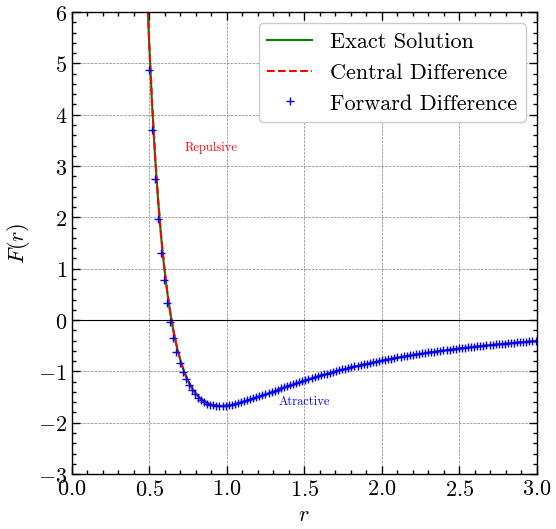

In [118]:
# Plot the force 
# Make a plot of the potential 
with plt.style.context(["science", "notebook", "no-latex", "grid"]):
    fig, ax = plt.subplots(figsize = (6, 6))

    ax.plot(r_vector,  F_vec, color = 'green', label = 'Exact Solution', linewidth = 1.5)
    ax.plot(r_vector,  F_vec_central, color = 'red', linestyle = '--', label = 'Central Difference', linewidth = 1.5)
    ax.plot(r_vector[:-1],  F_vec_forward, color = 'blue', linestyle = ' ', label = 'Forward Difference', marker = '+')
    #ax.plot(r_vector, v_r, color = 'darkred', label = 'Potential')
    ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)

    ax.text(0.3, 0.7, 'Repulsive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'red')
    ax.text(0.5, 0.15, 'Atractive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'blue')
    #ax.annotate(r'$r_0 = 0.6428$', xy=(0.7, 0), xytext=(1, 2),
             #arrowprops=dict(arrowstyle='->'), fontsize = 10)

    ax.set_xlabel(r"$r$")
    ax.set_ylabel(r'$F(r)$')
    ax.set_xlim(0, 3)
    ax.set_ylim(-3, 6)

    plt.legend()
    plt.show()

### (d) Find the maximum possible value of the attractive force $F(r)_{max}$ and the distance $r_{max}$ at which the particle would be subject to this force.

In [119]:
# Find the derivative of the force using sympy
diff_F_r = sp.diff(F_r)
diff_F_r

# Define the function
DF_r = sp.lambdify(r, diff_F_r, 'numpy')

In [120]:
# Now find the root of the derivative
root_DF_r = opt.fsolve(DF_r, 0.5)

In [121]:
# Print the root
print("r_max: ", root_DF_r[0])
print("F_max: ", F_r.subs(r, root_DF_r[0]))

r_max:  0.964285714285713
F_max:  -1.67291571406798


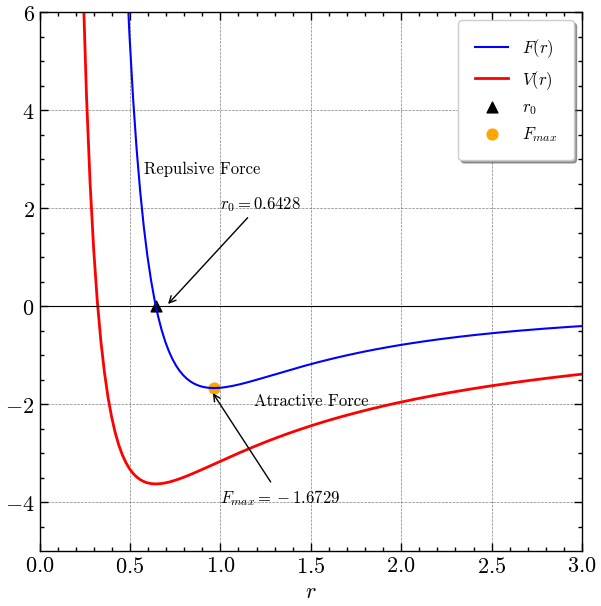

In [123]:
# Plot the force and the potential
# Make a plot of the potential
with plt.style.context(["science", "notebook", "no-latex", "grid"]):
    fig, ax = plt.subplots(figsize = (7, 7))

    ax.plot(r_vector,  F_vec, color = 'blue', label = r'$F(r)$', linewidth = 1.5)
    #ax.plot(r_vector,  F_vec_central, color = 'red', linestyle = '--', label = 'Central Difference', linewidth = 1.5)
    #ax.plot(r_vector[:-1],  F_vec_forward, color = 'blue', linestyle = ' ', label = 'Forward Difference', marker = '+')
    ax.plot(r_vector, v_r, color = 'red', label = r'$V(r)$')
    ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)
    ax.scatter(root_F_r, 0, color = 'black', marker = '^', label = r'$r_0$', s = 60)
    ax.scatter(root_DF_r, F_r.subs(r, root_DF_r[0]), color = 'orange', marker = 'o', label = r'$F_{max}$', s = 60)

    ax.text(0.3, 0.7, 'Repulsive Force', transform=ax.transAxes, ha='center', fontsize = 12, color = 'black')
    ax.text(0.5, 0.27, 'Atractive Force', transform=ax.transAxes, ha='center', fontsize = 12, color = 'black')
    ax.annotate(r'$r_0 = 0.6428$', xy=(0.7, 0), xytext=(1, 2),
             arrowprops=dict(arrowstyle='->'), fontsize = 12)
   # plt.annotate('', xy=(root_DF_r[0], F_r.subs(r, root_DF_r[0]))
   #             , xytext=(0, F_r.subs(r, root_DF_r[0])), arrowprops=dict(arrowstyle='<->', color='black'))
    ax.annotate(r'$F_{max} = -1.6729$', xy=(0.95, -1.73), xytext=(1, -4),
             arrowprops=dict(arrowstyle='->'), fontsize = 12)


    
    
    ax.set_xlabel(r"$r$")
    #ax.set_ylabel(r'$F(r)$')
    ax.set_xlim(0, 3)
    ax.set_ylim(-5, 6)

    ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize = 12)
    plt.show()
    

In [102]:
print("The maximum force is: ", F_r.subs(r, root_DF_r[0]))
print("The distance at which the maximum force occurs is: ", root_DF_r[0])

The maximum force is:  -1.67291571406798
The distance at which the maximum force occurs is:  0.964285714285713
